Exercise 5

1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom

2. Create a new Jupyter notebook

3. Load the dataset from CSV into pandas

4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?

5. The data is entirely categorical. Convert each feature to dummy variables.

6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.


  edibility cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0         p         x           s         n        t    p               f   
1         e         x           s         y        t    a               f   
2         e         b           s         w        t    l               f   
3         p         x           y         w        t    p               f   
4         e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w   

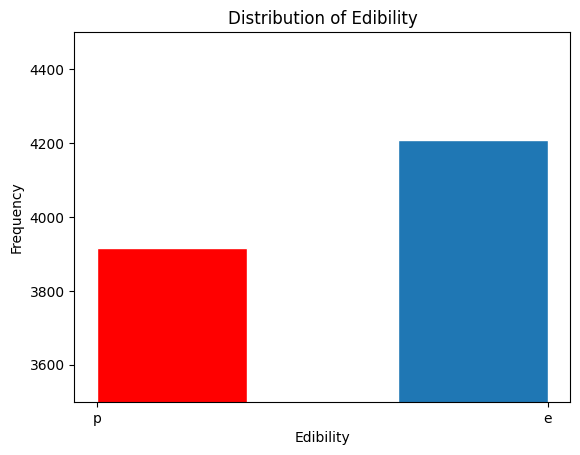


Amount of edibles: 
4208

Amount of poisonous: 
3916


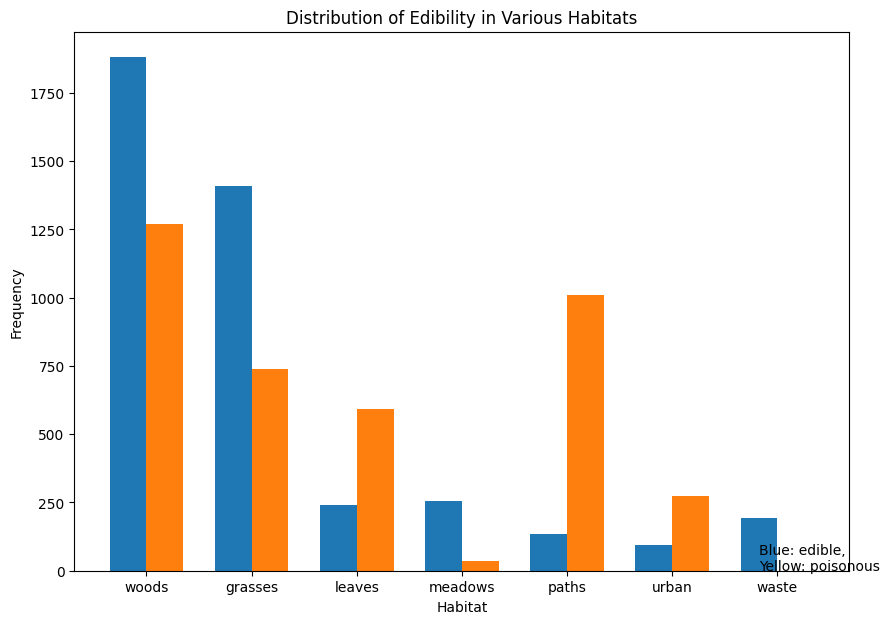

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import pandas as pd
fig, ax = plt.subplots()

data = pd.read_csv('sample_data/agaricus-lepiota.data', sep=',', header=0, engine='python')

#TASK 4
#https://saturncloud.io/blog/how-to-draw-a-distribution-of-a-column-in-pandas/#:~:text=To%20draw%20a%20distribution%20of%20a%20column%20in%20Pandas%2C%20we,the%20distribution%20of%20a%20dataset.
print(data.head())

print(data.describe())

print("\nData shape: ")
print(data.shape)

print("\nData info: ")
print(data.info())

_, bins, patches = ax.hist(data['edibility'], edgecolor='white', linewidth=1, bins=3)

patches[0].set_facecolor('r')
patches[1].set_facecolor('b')

plt.xlabel('Edibility')
plt.ylabel('Frequency')
plt.title('Distribution of Edibility')
plt.ylim(3500, 4500)

plt.show()

edibles = data[:][data['edibility']=='e']
print("\nAmount of edibles: ")
print(len(edibles))
print("\nAmount of poisonous: ")

print(len(data) - len(edibles))

df = data[['edibility', 'habitat']]

plot_data = pd.crosstab(df['edibility'], df['habitat'])

vals = [plot_data.iloc[i].values for i in range(len(plot_data))]

plt.figure(figsize=(10, 7))

index = np.arange(len(plot_data.columns))

label_mapping = {
    'g': 'grasses',
    'l': 'leaves',
    'm': 'meadows',
    'p': 'paths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'
}
x_labels = [label_mapping[label] for label in plot_data.columns]

for i, element in enumerate(vals):
  plt.bar(index + i * 0.35, element, 0.35)



plt.annotate('Blue: edible, \nYellow: poisonous', xy=(6,2))
plt.ylabel('Frequency')
plt.xlabel('Habitat')
plt.title('Distribution of Edibility in Various Habitats')
plt.xticks(index + 0.35/2, x_labels)
plt.show()





In [ ]:
#TASK 5

dummies = pd.get_dummies(data)
print(dummies.head())

print(dummies.describe())

   edibility_e  edibility_p  cap-shape_b  cap-shape_c  cap-shape_f  \
0            0            1            0            0            0   
1            1            0            0            0            0   
2            1            0            1            0            0   
3            0            1            0            0            0   
4            1            0            0            0            0   

   cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  \
0            0            0            1              0              0  ...   
1            0            0            1              0              0  ...   
2            0            0            0              0              0  ...   
3            0            0            1              0              0  ...   
4            0            0            1              0              0  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1         

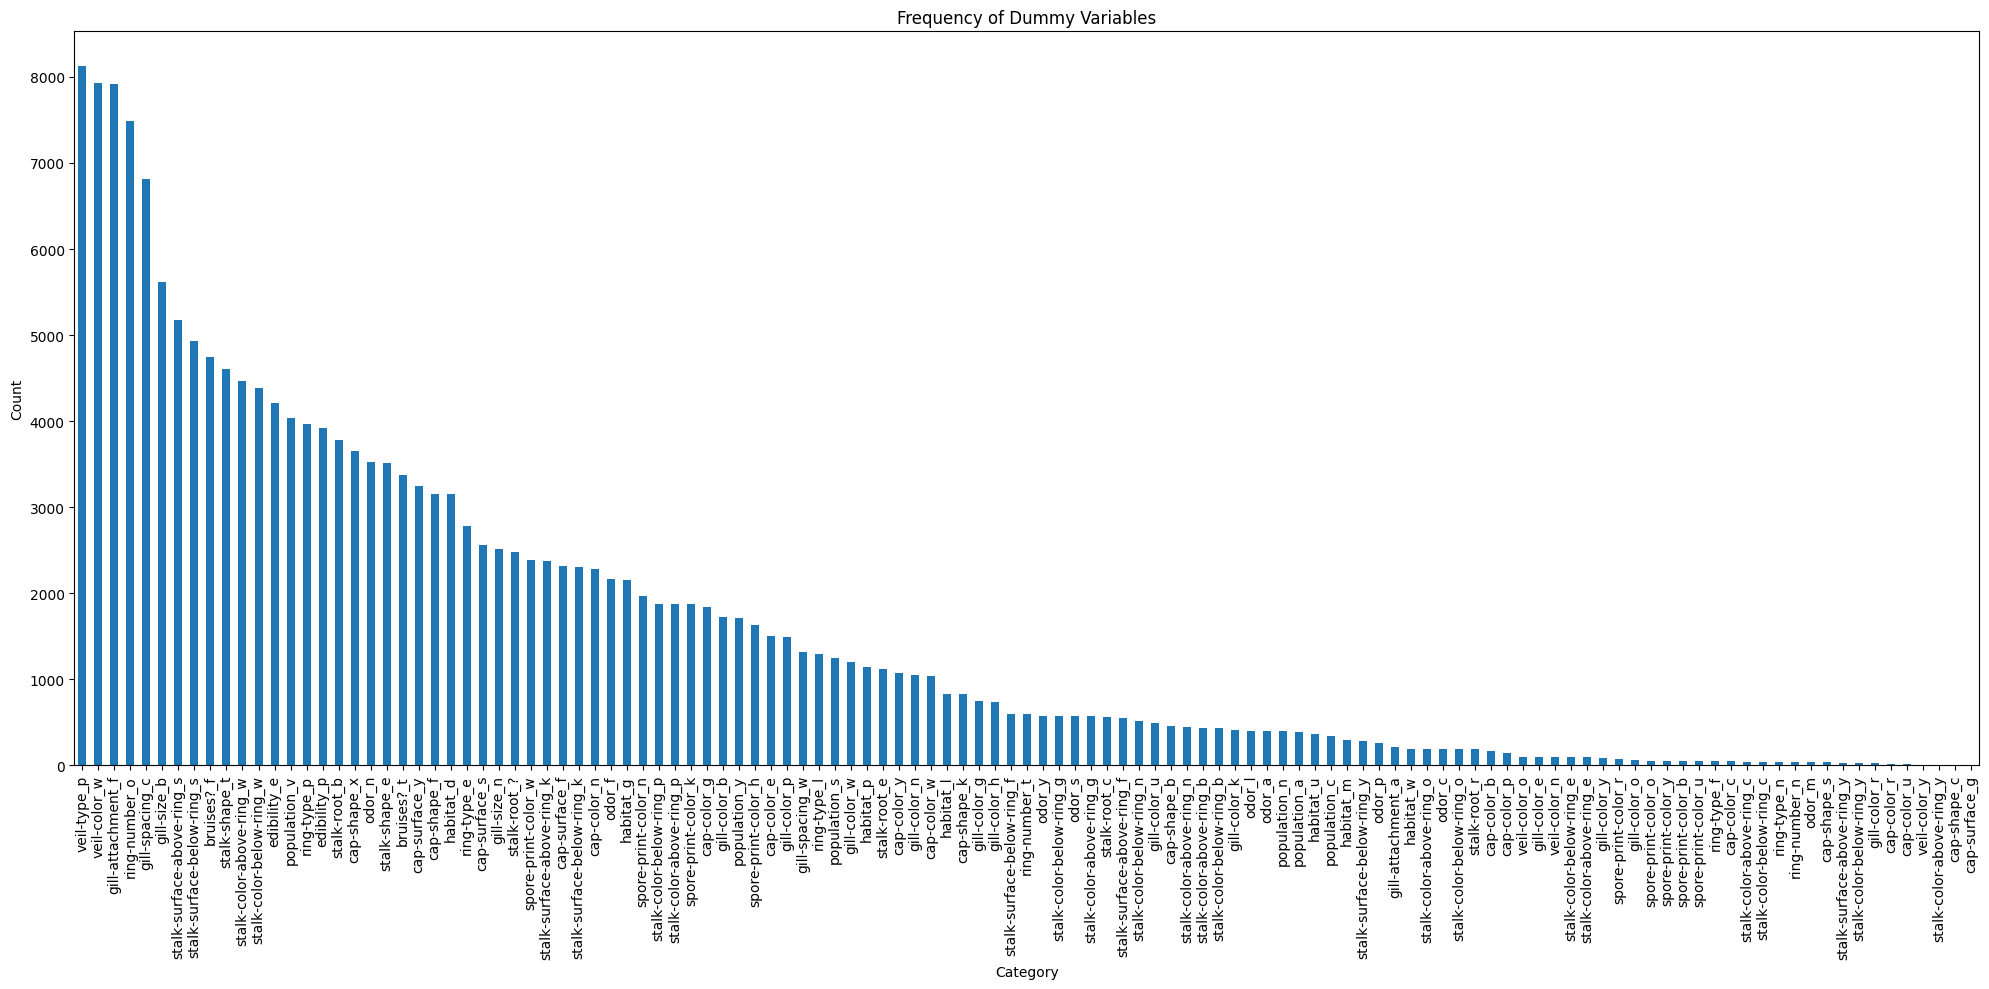

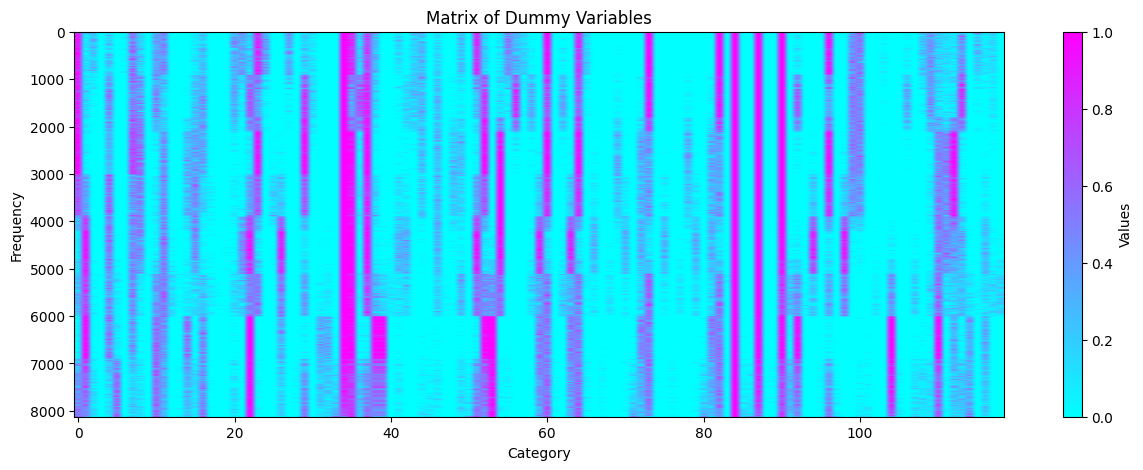

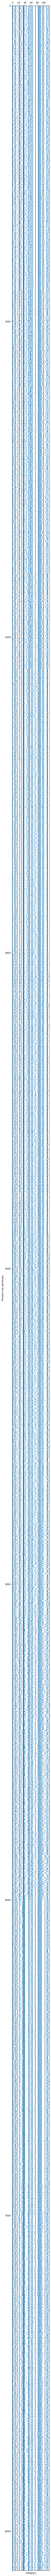

In [ ]:
#TASK 6
col_sums = dummies.sum(axis=0)

# Sorts the sums in descending order
sorted_sums = col_sums.sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sorted_sums.plot(kind='bar', xlabel='Category', ylabel='Count')
plt.title("Frequency of Dummy Variables")
plt.tight_layout()
plt.show()

matrix = (dummies.to_numpy())

# Creates an image plot for the matrix
plt.figure(figsize=(15, 5))

plt.imshow(matrix, aspect='auto', cmap='cool')
plt.colorbar(label='Values')
plt.title("Matrix of Dummy Variables")
plt.xlabel("Category")
plt.ylabel("Frequency")

plt.show()

plt.figure(figsize=(40, 200))
plt.spy(dummies, markersize=1)
plt.ylabel("Present row attributes")
plt.xlabel("Category")
plt.show()